<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [2]:
# How can we quickly look at some descriptive statistics of the above dataframe?
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


descriptive statistics - describe the distribution of the data. not used to reach any conclusions. possibly used to identify patterns in the data

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

 - generalizing from a sample to a population with calculated degree of certainty
 

## Hypothesis Testing (T-Tests)

 if you make a claim and need to declare how confident you are in that claim, use t-tests

does what we see match our hypothesis

is it reflective of what we expect



Ever thought about how long it takes to make a pancake? Have you ever compared the cooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
burner1_mu = 180
burner1_sigma = 5
sample1 = np.random.normal(burner1_mu, burner1_sigma, 1000)

In [0]:
burner2_mu = 178.5
burner2_sigma = 4.25
sample2 = np.random.normal(burner2_mu, burner2_sigma, 800)

In [20]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01  # absolute deviation

True

In [23]:
print(abs(burner1_mu - np.mean(sample1)) < 0.1)  # absolute deviation
print(abs(burner2_mu - np.mean(sample2)) < 0.1)  # absolute deviation

True
True


In [24]:
print(np.mean(sample1))
print(np.mean(sample2))

179.9726584860665
178.57712204662587


In [5]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

In [26]:
print(abs(burner1_sigma - np.std(sample1, ddof=1)) < 0.01)
print(abs(burner2_sigma - np.std(sample2, ddof=1)) < 0.01)


False
False


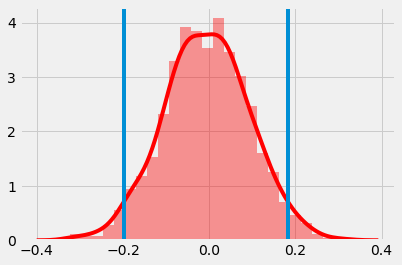

In [27]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

When we talk about the population parameters, we use mu and sigma for mean and standard deviation.

When we talk about the sample statistics, we use x-bar ($\bar{x}$) and s



# out first 2 sample t-test (pancakes)

1) Null hypothesis (boring hypothesis) (sample mean of 1 == sample mean of the other) (mu1 == mu2) : avg cooking time between burners is the same

2) Alternative hypothesis (usually ooposite of null hypothesis)

  mu1 != mu2

  mu1 - m2 != 0

3) Confidence level: the probability of seeing a true result in spite of random variablility. Also, how often do I want to make sure that I'm right. typically 95% confident, can use any level you want



In [28]:
from scipy.stats import ttest_ind

ttest_ind(sample1, sample2)

Ttest_indResult(statistic=6.51037439606262, pvalue=9.69765752029289e-11)

4) T statistic - value that falls along a t-distribution

- a vertical bar that falls on our t-distribution

5) P=value: the p-value we are interested in is (1 - confidence level). our case 0.05

- the probability of getting this test result due to random chance

- the probability of our null hypothesis being true

6) Conclusion

due t oobserving a t-statistic of 6.5 and a resulting p-value of .000000000969, we reject the null hypothesis that the cooking times of these two burners is the same, and sugguest the alternative hypothesis, that they are different

because our p-value was less than 0.05( 1 - confidence level), we reject the null hypothesis.

0.05 sometimes called alpha value

degrees-of-freedom = sample size - 1

std-dev: how spread out



# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

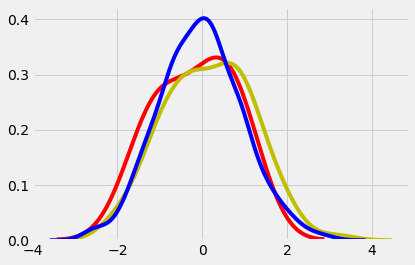

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [30]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-04 18:10:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-11-04 18:10:32 (624 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:
df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')

In [36]:
df

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [38]:
df = df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [40]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [43]:
rep = df[df['party'] == 'republican'] 
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [44]:
dem = df[df['party'] == 'democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [50]:
# % of repubs who voted yes
# 3 nans but dividing by full length
rep['handicapped-infants'].sum() / len(rep)

# dropping nans on column as we calculate, not permanently
col = rep['handicapped-infants']

np.isnan(col)

handicapped_infants_no_nans = rep['handicapped-infants'][~np.isnan(col)]

#same column, minus nans
handicapped_infants_no_nans


0      0.0
1      0.0
7      0.0
8      0.0
10     0.0
      ... 
427    0.0
430    0.0
432    0.0
433    0.0
434    0.0
Name: handicapped-infants, Length: 165, dtype: float64

In [51]:
print(handicapped_infants_no_nans.sum()/len(handicapped_infants_no_nans))

0.18787878787878787


In [47]:
# average rate of voting 'yes'
rep['handicapped-infants'].mean()

0.18787878787878787

In [48]:
rep.isnull().sum()

party                    0
handicapped-infants      3
water-project           20
budget                   4
physician-fee-freeze     3
el-salvador-aid          3
religious-groups         2
anti-satellite-ban       6
aid-to-contras          11
mx-missile               3
immigration              3
synfuels                 9
education               13
right-to-sue            10
crime                    7
duty-free               12
south-africa            22
dtype: int64

## water project bill

- null hypothesis: no difference between average voting rates (levels of support) for the water project bill between demecrats and republicans in the house of representatives
 - support is equal
 - $\bar{x}_{1} = \bar{x}_{2}$ where $\bar{x}_{1}$ is the mean of republican votes and $\bar{x}_{2}$ =dem.mean()
- Alternative hypothesis: levels of support between two parties will differ
 - $\bar{x}_{1} \neq \bar{x}_{2}$
- 95% confidence level


In [53]:
rep['water-project'].mean()

0.5067567567567568

In [54]:
dem['water-project'].mean()

0.502092050209205

In [52]:
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

In [0]:
gol = rep['water-project']
wtr_rep = gol[~np.isnan(gol)]

gol = dem['water-project']
wtr_dem = gol[~np.isnan(gol)]


In [58]:
len(wtr_rep)

148

In [59]:
len(wtr_dem)

239

when i have two samples while using a 2-sample t-test, I will use the smaller of the two samples to determine the degrees of freedom.

dof = size - 1
def = 147

- t-stat = .889
- p-value = .929

i want to reject the null hypothesis if my p-value < 0.05 or if my p-value is less than (1-confidence level)

Conclusion: due to a p-value of .929, I fail to reject the null hypothesis that democrat and republican support for the water project is different.

never say, 'accept the null hypothesis'. only say 'fail to reject the null hypothesis'.



## One sample t-test

only one sample, null hypothesis is different

looking at democratic support of the south africa bill
- Null hypothesis 1a: $\bar{x}_{1}$ avg dem support for SA nill == 1 (full support)
- Null hypothesis 1b: $\bar{x}_{1}$ avg dem support for SA nill == .5 (split support)
- Null hypothesis 1c: $\bar{x}_{1}$ avg dem support for SA nill == 0 (null support)

**with 1 sample t-tests, i can frame the question i'm asking through my choice of null-hypothesis**


- Null hypothesis 1b: $\bar{x}_{1}$ avg dem support for SA nill == .5 (split support)

- Alternative hypothesis: support != 50%

always the opposite of null hypothesis

this says nothing about support being greater or less than 50%, just that it is not 50%

- Confidence level: 95% (standardish in scientific research. using a weak confidence level leads to non-reproducability) (95% is kinda weak, especially with lots of data)

In [68]:
from scipy.stats import ttest_1samp
ttest_1samp(dem['south-africa'], .9, nan_policy='omit')

Ttest_1sampResult(statistic=1.935123083617057, pvalue=0.05450836316336539)

- due to a p-value of < 0, we reject the null hypothesis that democratic support for the south africa bill is .5 (split-party) and conclude that it is something different

In [65]:
dem['south-africa'].mean()

0.9351351351351351

In [60]:
df.columns

Index(['party', 'handicapped-infants', 'water-project', 'budget',
       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
       'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
       'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
       'south-africa'],
      dtype='object')

In [69]:
ttest_1samp(dem['south-africa'], [0.667, 1.0], nan_policy='omit')

Ttest_1sampResult(statistic=array([14.76796624, -3.57253492]), pvalue=masked_array(data=[4.62437434e-33, 4.51378910e-04],
             mask=False,
       fill_value=1e+20))

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means